# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [2]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [15]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
def build_mlp(input_shape, output_unit=10, num_neurons=[256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    x = keras.layers.Dense(units=num_neurons[0], activation="relu", name="hidden_layer_1")(input_layer)
    x = keras.layers.Dense(units=num_neurons[1], activation="relu", name="hidden_layer_2")(x)
    x = keras.layers.Dense(units=num_neurons[2], activation="relu", name="hidden_layer_3")(x)
    output = keras.layers.Dense(units=output_unit, activation="softmax", name="output")(x)
    
    model = keras.models.Model(input=[input_layer], outputs=[output])
    
    return model

In [28]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2]
EPOCHS = 20
BATCH_SIZE = 128
MOMENTUM = 0.9

In [29]:
results = {}
for i in range(3):
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        if i==0:
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
            opt_name = "SGD"
        if i==1:
            #optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
            optimizer = "adam"
            opt_name = "Adam"
        if i==2:
            #optimizer = keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)
            optimizer = "RMSProp"
            opt_name = "RMSProp"
        print("------------------------------------------")
        print(opt_name, " Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()

        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
    # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = opt_name + "-exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


------------------------------------------
SGD  Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 256)               786688    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 128)               32896     
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


C:\Users\Hsin-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 202us/step - loss: 2.0059 - acc: 0.2542 - val_loss: 1.8959 - val_acc: 0.3093
Epoch 2/20
50000/50000 [==============================] - 10s 195us/step - loss: 1.9109 - acc: 0.2996 - val_loss: 1.8805 - val_acc: 0.3035
Epoch 3/20
50000/50000 [==============================] - 9s 174us/step - loss: 1.8687 - acc: 0.3187 - val_loss: 1.8177 - val_acc: 0.3482
Epoch 4/20
50000/50000 [==============================] - 10s 200us/step - loss: 1.8744 - acc: 0.3208 - val_loss: 1.8710 - val_acc: 0.3244
Epoch 5/20
50000/50000 [==============================] - 13s 253us/step - loss: 1.8742 - acc: 0.3238 - val_loss: 1.8103 - val_acc: 0.3488
Epoch 6/20
50000/50000 [==============================] - 13s 256us/step - loss: 1.8549 - acc: 0.3297 - val_loss: 1.7978 - val_acc: 0.3441
Epoch 7/20
50000/50000 [==============================] - 10s 202us/step - loss: 1.8311 - acc: 0.3411 - val_loss: 1.8

50000/50000 [==============================] - 14s 271us/step - loss: 1.6254 - acc: 0.4194 - val_loss: 1.6260 - val_acc: 0.4211
Epoch 4/20
50000/50000 [==============================] - 13s 269us/step - loss: 1.5580 - acc: 0.4430 - val_loss: 1.5311 - val_acc: 0.4563
Epoch 5/20
50000/50000 [==============================] - 13s 269us/step - loss: 1.5137 - acc: 0.4612 - val_loss: 1.4942 - val_acc: 0.4755
Epoch 6/20
50000/50000 [==============================] - 14s 270us/step - loss: 1.4743 - acc: 0.4765 - val_loss: 1.4781 - val_acc: 0.4754
Epoch 7/20
50000/50000 [==============================] - 14s 271us/step - loss: 1.4481 - acc: 0.4857 - val_loss: 1.4604 - val_acc: 0.4879
Epoch 8/20
50000/50000 [==============================] - 14s 276us/step - loss: 1.4217 - acc: 0.4927 - val_loss: 1.4783 - val_acc: 0.4740
Epoch 9/20
50000/50000 [==============================] - 14s 287us/step - loss: 1.4046 - acc: 0.4991 - val_loss: 1.4321 - val_acc: 0.4909
Epoch 10/20
50000/50000 [=============

50000/50000 [==============================] - 11s 226us/step - loss: 1.5928 - acc: 0.4300 - val_loss: 1.6716 - val_acc: 0.4128
Epoch 6/20
50000/50000 [==============================] - 11s 225us/step - loss: 1.5526 - acc: 0.4449 - val_loss: 1.5524 - val_acc: 0.4456
Epoch 7/20
50000/50000 [==============================] - 11s 226us/step - loss: 1.5194 - acc: 0.4553 - val_loss: 1.5818 - val_acc: 0.4419
Epoch 8/20
50000/50000 [==============================] - 11s 229us/step - loss: 1.4914 - acc: 0.4686 - val_loss: 1.5509 - val_acc: 0.4547
Epoch 9/20
50000/50000 [==============================] - 11s 226us/step - loss: 1.4644 - acc: 0.4763 - val_loss: 1.5227 - val_acc: 0.4614
Epoch 10/20
50000/50000 [==============================] - 11s 225us/step - loss: 1.4423 - acc: 0.4835 - val_loss: 1.5358 - val_acc: 0.4619
Epoch 11/20
50000/50000 [==============================] - 11s 227us/step - loss: 1.4188 - acc: 0.4943 - val_loss: 1.5449 - val_acc: 0.4533
Epoch 12/20
50000/50000 [===========

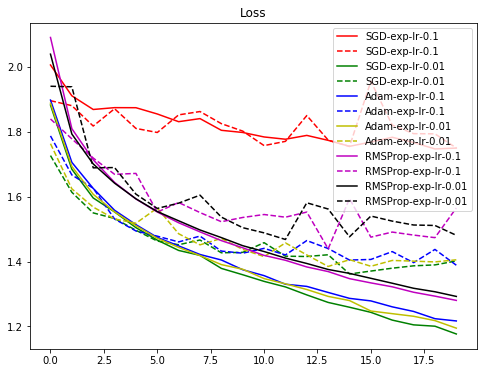

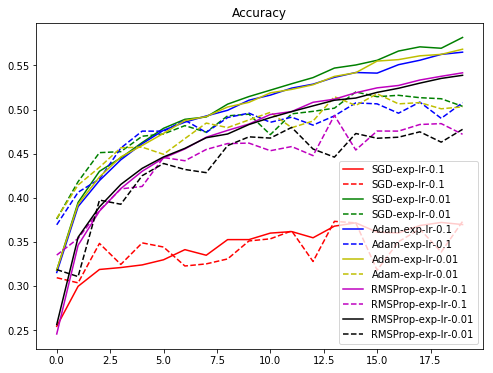

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()